# Transfer function analysis

This little Jupyter notebook will help you analyze dynamic systems, by their transfer function.

Insert your own transfer function in the G(s) function definition and launch the code block to initialize the script, then move ahead.

In [ ]:
import matplotlib.pyplot as plot
import numpy as np
from mpmath import invertlaplace

def db(x):
    return 20*np.log10(x)

mu_r = 0.1037

# Insert your own transfer function here:
def G(s):
    return 10*mu_r/((1+0.25*s)*(1+0.111*s))


# Bode Diagrams

Choose the `start_range` and `end_range` for the angular frequencies to be used in the Bode plots. Launch the code block to show the plots. It might take a while, if the range is long.

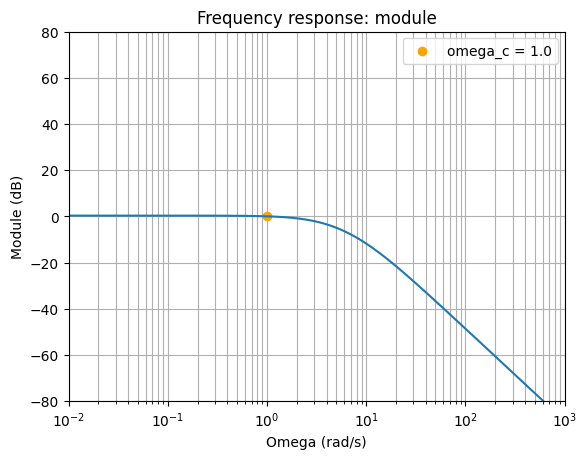

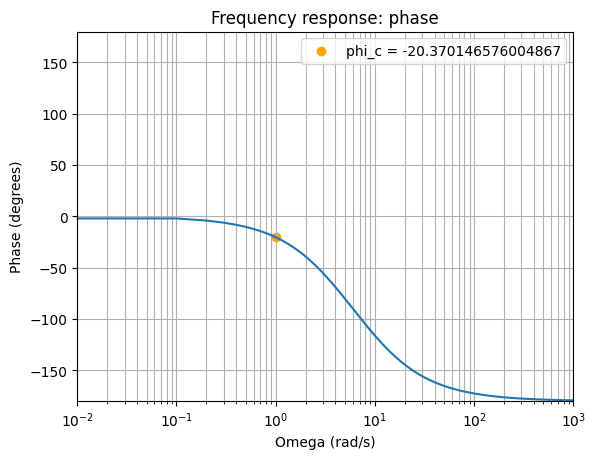

In [ ]:
start_range = 10e-2
end_range = 10e2



omega = np.arange(0, end_range, start_range)

module = [db( abs(G(1j*x)) ) for x in omega]
phase = [np.angle(G(1j*x), deg=True) for x in omega]

omega_c_pos = np.min(np.abs(module))
omega_c = omega[((np.where(np.abs(module) == omega_c_pos))[0])[0]]
phi_c = phase[((np.where(np.abs(module) == omega_c_pos))[0])[0]]


# --------------
# MODULE DIAGRAM
plot.grid(True, which="both")
plot.semilogx(omega, module)
plot.ylim([-80,80])
plot.xlim([start_range/10,end_range])
plot.scatter(omega_c, 0, color='orange', label='omega_c = {}'.format(omega_c))
plot.legend()

# Plot title
plot.title('Frequency response: module')
# X label
plot.xlabel('Omega (rad/s)')
# Y label
plot.ylabel('Module (dB)')
# Show the graph
plot.show()

# -------------
# PHASE DIAGRAM
plot.grid(True, which="both")
plot.semilogx(omega, phase)
plot.ylim([-180,180])
plot.xlim([start_range/10,end_range])
plot.scatter(omega_c, phi_c, color='orange', label='phi_c = {}'.format(phi_c))
plot.legend()

# Plot title
plot.title('Frequency response: phase')
# X label
plot.xlabel('Omega (rad/s)')
# Y label
plot.ylabel('Phase (degrees)')
# Show the graph
plot.show()

# Nyquist Diagram
This doesn't require much tweaking. It should work out of the box. Just like the Nyquist diagram, it might take a while to calculate.

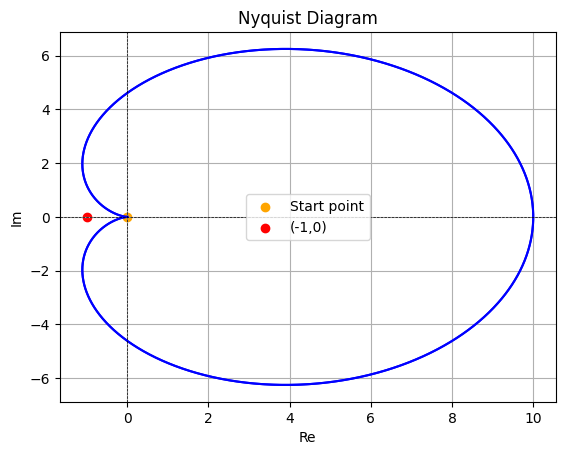

In [ ]:
# NYQUIST DIAGRAM
omega = np.arange(-500,500,0.009)
complex_values = [G(1j*x) for x in omega]
plot.plot(np.real(complex_values), np.imag(complex_values), color='blue')
plot.plot(np.real(complex_values), -np.imag(complex_values), color='blue')
plot.scatter(np.real(complex_values)[0], np.imag(complex_values)[0], color='orange', label='Start point')
plot.scatter(-1, 0, color='red', label='(-1,0)')
plot.xlabel('Re')
plot.ylabel('Im')
plot.title('Nyquist Diagram')
plot.axhline(0, color='black', linestyle='--', linewidth=0.5)  # Add a horizontal dashed line at y=0
plot.axvline(0, color='black', linestyle='--', linewidth=0.5)  # Add a vertical dashed line at x=0
plot.legend()
plot.grid(True)
plot.show()

# Impulse and Step response

The following code block uses the `invertlaplace` method from `mpmath` to get a numerical approximation of the Laplace antitransform. This allows the script to make an approximate plot of the step response, directly from the transfer function, without any need for the full state representation of the system.

- the `end_range` variable indicates the time span in seconds that will be used to create the plot
- the `precision` variable is the number of samples that will be computed
- `step_amplitude` is the amplitude of the input step function
- `inversion_method` allows to choose the type of numerical antitransform technique between the four methods offered by `mpmath`

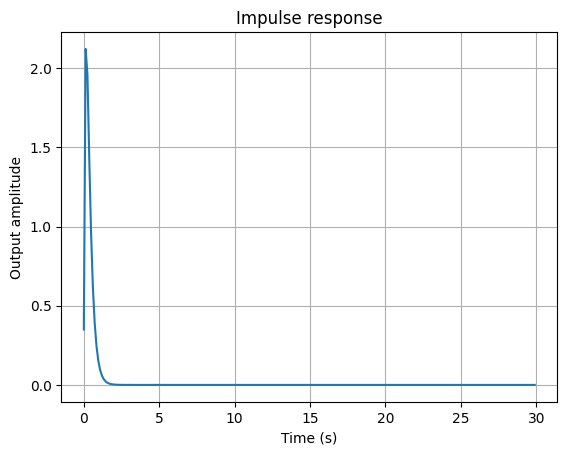

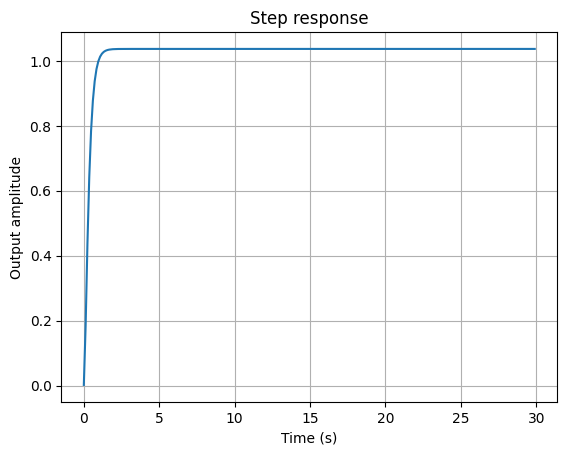

In [ ]:
end_range = 30 # time span in seconds
precision = 250 # number of samples
step_amplitude = 1
inversion_method = 'cohen' # talbot, cohen, stehfest, dehoog

x = np.arange(0.01,end_range,end_range/precision)

# ----------------------
# IMPULSE RESPONSE GRAPH
f_inv = [invertlaplace(G, t, method=inversion_method) for t in x]

plot.grid(True, which="both", axis="both")
plot.plot(x,f_inv)
# Plot title
plot.title('Impulse response')
# X label
plot.xlabel('Time (s)')
# Y label
plot.ylabel('Output amplitude')
# Show the plot
plot.show()

# -------------------
# STEP RESPONSE GRAPH
def step(s):
    return step_amplitude * G(s)/s

f_inv = [invertlaplace(step, t, method=inversion_method) for t in x] # talbot, cohen, stehfest, dehoog

plot.grid(True, which="both", axis="both")
plot.plot(x,f_inv)
# Plot title
plot.title('Step response')
# X label
plot.xlabel('Time (s)')
# Y label
plot.ylabel('Output amplitude')
# Show the plot
plot.show()